In [1]:
import tensorflow
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1> Fashion MNIST </h1>

The Fashion MNIST has the same format of MNIST (70,000 grayscale 28x28 pixel images). However, the Fashion MNIST contains 10 different classes, showing to be a harder classification task than the classical MNIST usually solved with linear learning models.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist #Loading the Dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The initial dataset load already split the train/test cases. However, it does not create a validation set. Moreover, the datatype is an unsigned integer value between 0 and 255. As the Gradient Descent algorithm will be used during the learning phase, it is important to shift the data to [0,1] domain. Naturally, the datatype will become a set of floats.

In [3]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [4]:
# As the output is a Number, we can use a list to get the correct lab
class_names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

The first example of the MLP is using 4 layers, 1 for a flatten input, 2 hidden layers, and an output layer with 10 neurons using the softmax activation. The softmax activation function is needed since the classes are exclusive among each other.

There are different way to create the model. In this first case we stack each layer in a sequential mode, instantiating each layer one by one.

<h1> Creating a simple MLP </h1>

In [5]:
model = keras.models.Sequential() #Creates a Sequential model, a stack of layers
model.add(keras.layers.Flatten(input_shape=[28,28])) #Transform a matrix into 1D array (input layer)
model.add(keras.layers.Dense(300,activation="relu")) #The first hidden layer with 300 neurons with ReLU
model.add(keras.layers.Dense(100, activation="relu")) #The second hidden layer with 100 neurons
model.add(keras.layers.Dense(10, activation="softmax")) #A softmax (classes are exclusive) output layer

A second option is to input a list of layers to the Sequential constructor. After the model instantiation it is possible to check with the model.summary() the shape of the MLP.

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


<h1> Compiling the Model </h1>

After the layer initialization it is important to to compile the model through the compile() method. In the compile() method it is possible to specify the loss function, the optimizer, and the list of observable metrics to compute during the training.

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

As we are using the softmax function as output layer, it means that for each problem instance there is only one target. The classes are exclusive.

After the compilation step, our model is ready to be trained. For this, we use the fit() method, passing the training set (X and y), the number of epochs, and, optionally, the validation data.

Informing the validation data is an interesting approach since it is possible to compare the performance of the learning model on both training and validation set. Moreover, if the performance of the training set is much bigger than the validation set, than, probably, the learning model overfitted to the training data.

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 4ms/step - loss: 0.7102 - accuracy: 0.7656 - val_loss: 0.4968 - val_accuracy: 0.8360
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4877 - accuracy: 0.8280 - val_loss: 0.4423 - val_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4422 - accuracy: 0.8434 - val_loss: 0.4224 - val_accuracy: 0.8548
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4156 - accuracy: 0.8538 - val_loss: 0.3929 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3943 - accuracy: 0.8613 - val_loss: 0.3905 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3792 - accuracy: 0.8667 - val_loss: 0.3699 - val_accuracy: 0.8738
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3659 - accuracy: 0.8711 - val_loss: 0.3582 - val_accuracy

The fit() method returns an history object containing the training parameters, the list of epochs it used, and a dictionary containing the loss and extra metrics configured before. With all these data it is possible to observe the loss minimization during the training step.

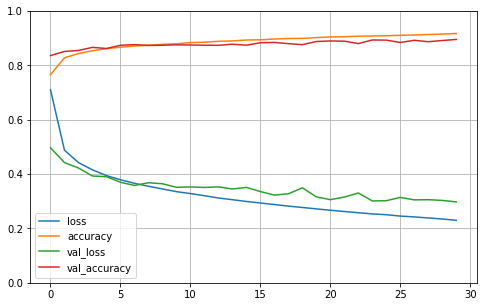

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

With the trained model it is possible to evaluate the performance of the model using the test group in order to verify the generalization capability of our model.

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3253 - accuracy: 0.8850


[0.325318306684494, 0.8849999904632568]

<h1> Using the Model </h1>

As the last step, we can use our model to do predictions on new instances. Since we do not have any new input, lets take some instances from the test set and verify the output.

Finally, we can save our model.

In [25]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

As is possible to observe, the model estimates a probability for each possible class in each instance. For example, in the first line there is a 97% to be the class 9, while for line 2 the class 3 has 100% of probability to be that class.

In [33]:
final_result = np.argmax(y_prob, axis=1)
final_result = np.array(class_names)[final_result]
print(final_result)

['Ankle boot' 'Pullover' 'Trouser']


In [9]:
#model.save("/home/phnarloch/Documentos/Source/fashion_mnist_model.h5")
#To load the model:
model = keras.models.load_model("/home/phnarloch/Documentos/Source/fashion_mnist_model.h5")

In [11]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


It is possible to use callbacks in order to save checkpoints during the training phase. For other callbacks function: keras.io/callbacks

In [13]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 0.2265 - accuracy: 0.9185
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2224 - accuracy: 0.9198
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2192 - accuracy: 0.9208
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2160 - accuracy: 0.9229
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2124 - accuracy: 0.9237
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2096 - accuracy: 0.9243
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2059 - accuracy: 0.9256
Epoch 8/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2029 - accuracy: 0.9264
Epoch 9/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2001 - accuracy: 0.9280
Epoch 10/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.196

For a better visualization of what is happening during the trainin-phase we can use the TensorBoard visualization from the Tensorflow library.

In [15]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

In [18]:
def get_run_logdir():
    import time
    run_id =time.strftime("run_%Y_%m_%d-%H_%M_%S")
    
    return os.path.join(root_logdir, run_id)

In [19]:
run_logdir = get_run_logdir()

In [22]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1931 - accuracy: 0.9314 - val_loss: 0.2946 - val_accuracy: 0.8954
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1904 - accuracy: 0.9324 - val_loss: 0.3017 - val_accuracy: 0.8866
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1871 - accuracy: 0.9332 - val_loss: 0.3101 - val_accuracy: 0.8930
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1853 - accuracy: 0.9328 - val_loss: 0.3127 - val_accuracy: 0.8866
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1823 - accuracy: 0.9353 - val_loss: 0.3001 - val_accuracy: 0.8908
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1799 - accuracy: 0.9353 - val_loss: 0.3258 - val_accuracy: 0.8862
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1761 - accuracy: 0.9373 - val_loss: 0.2967 - val_accuracy:

In [23]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6606